# Компьютерный практикум
## Домашняя работа 1, модуль 4

###### Бобер Станислав Алексеевич
###### Ст. преп. Департамента Прикладной Математики
###### e-mail: sbober@hse.ru, stas.bober@gmail.com

-----
#### Выполненную работу необходимо загрузить по ссылке:
[ЗАГРУЗИТЬ РЕШЕНИЕ](https://www.dropbox.com/request/bIOWV6R94rHZwx3a643F)



-----
**Решения необходимо выполнить в этом ноутбуке в одной или несколькиих ячейках с кодом,
следующих непосредственно после ячейки с надписью "Задание X", где X - целое число.**

**Каждое решение должно быть рабочим независимо от остального кода в этом ноутбуке.**

-----
#### Задание 0

В архиве `evolution.zip` находятся 360 файлов с именами `evolution_NNN.txt`, где `NNN = 000...359` - номер орбиты. В первом столбце каждого файла записаны расстояния (в км) перицентров орбиты (ближайших к планете точек) на каждый из 225 дней.

Необходимо:
1. Сформировать `DataFrame`, в котором 225 столбцов и 360 строк. Каждая строка соответствует орбите, а столбец - дню. В ячейках записаны расстояния перицентров.
2. Найти номера орбит, расстояние перицентров которых всегда больше 6350 км.
3. Изобразить цветовую карту (`contourf`): по оси абсцисс - номер орбиты, по оси ординат - номер дня, цветом отображены расстояния перицентров. Рядом с цветовой картой изобразить colorbar.
4. Изобразить поверх цветовой карты изолинии (`contour`), соответствующие уровням 6050, 6250, 6350 км.

In [141]:
import pandas as pd
import numpy as np
import matplotlib

import matplotlib.pyplot as plt



df = pd.read_csv('evolution_000.txt' , header=0, sep = " * ", engine='python', names = [1, 2]  )
df = df.drop(columns=[2]).T
 

for i in range(1, 360):

    if (i>99):
        to_file = str(i)
    elif (i<10):
        to_file = "00" + str(i)
    else: 
        to_file = "0" + str(i)
    temp =  pd.read_csv('evolution_' + to_file+ '.txt' , header=0, sep = " * ", engine='python', names = [1, 2]  )
    
    temp = temp.drop(columns=[2]).T
    
    df = pd.concat([df, temp] )
        
        
df = df.reset_index(  drop=True)
print("Размер DataFrame : ", df.shape) 
# все работает 

qw = df[df[0]>6350]
for i in range(1, 225):
    qw = qw[qw[i]>6350 ] 
    
print("номера орбит, расстояние перицентров которых всегда больше 6350 км ")
for i in qw.index:
    print(i,end=" ")
    
    

Размер DataFrame :  (360, 225)
номера орбит, расстояние перицентров которых всегда больше 6350 км 
0 1 2 3 4 5 6 7 8 9 10 11 12 13 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322 323 324 325 326 327 328 329 330 331 332 333 334 335 336 337 338 339 340 341 342 343 344 345 346 347 348 349 350 3

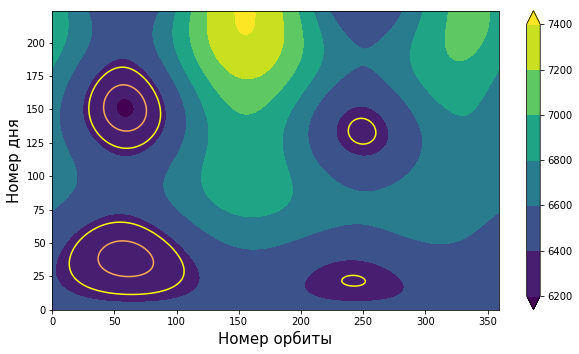

In [180]:
import pandas as pd
import numpy as np
import matplotlib

import matplotlib.pyplot as plt
 
x = df.index
y = df.columns
h = df.loc[x][y]
h=h.T


plt.figure(figsize=(10,5.5))
plt.contourf( h,  extend='both')
plt.xlabel("Номер орбиты", fontsize=15)
plt.ylabel("Номер дня", fontsize=15)

plt.colorbar()
plt.contour([i for i in range(360)], [i for i in range(225)], df.values.T,levels=[6050, 6250, 6350],cmap = 'spring' )



-----
#### Задание 1

В файле `PR_HLY_L1_Sun-Earth (default).npy` находится массив `numpy` с плоскими кривыми - горизонтальными орбитами Ляпунова, лежащими в плоскости XY. Орбиты заданы в полярной системе координат `r-theta` с центром в точке $L_1$, лежащей на оси X. Каждой орбите соответствует строка массива, где записаны длины радиус-векторов каждой точки орбиты от точки $L_1$. Все радиус-вектора соответствуют углам `theta = np.linspace(0., np.pi, 720)`.
Функция `w` определена ниже.

Необходимо: 
1. На каждой орбите найти точку, соответствующую минимуму функции $\omega$
2. Изобразить на графике все орбиты и найденные точки

$ w(x,y) = \frac{x^2 + y^2}{2} + \frac{1 - \mu}{r_1} + \frac{\mu}{r_2} $

$ r_1 = \sqrt{(x + \mu)^2 + y^2} $

$ r_2 = \sqrt{((x - (1-\mu))^2 + y^2} $

$ \mu = 3.001348389698916e-06 $

$ L_1 = 0.9900289479871328 $

Для поиска минимума следует для каждой орбиты:
0. сформировать массивы `r` (строка из файла) и `theta = np.linspace(0., np.pi, 720)`
1. построить сплайн `sr(theta)` при помощи `scipy.interpolate.InterpolatedUnivariateSpline` и данных из `п.0.`
2. написать функцию `rth2xy(r, theta)` для вычисления координат `x-y` по координатам `r-theta` (не забывая, что `r` задан относительно $L_1$)
3. написать функцию вычисления `w(x, y)`
4. написать функцию вычисления `w1(theta) = w(rth2xy(sr(theta), theta))`, используя `пп.1.,2.,3.`
5. минимизировать функцию `w1(theta)` для `theta` на отрезке `[1, 2.2]` при помощи `scipy.optimize.fminbound`
6. по полученному `theta*` вычислить `x*,y* = rth2xy(sr(theta*), theta*)`

Размерность данных:  (935, 720)


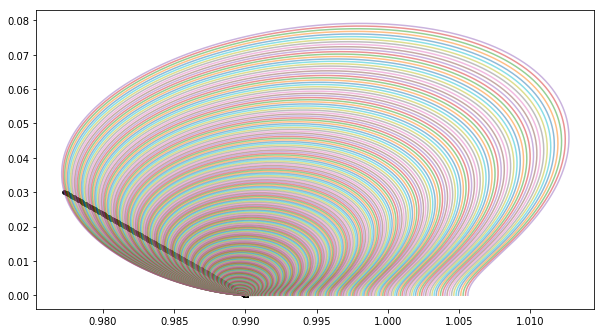

In [229]:
import pandas as pd
import numpy as np
import matplotlib
from scipy import optimize
import matplotlib.pyplot as plt
from scipy.interpolate import InterpolatedUnivariateSpline

L1  = 0.9900289479871328
nu = 3.001348389698916e-06
data = np.load('PR_HLY_L1_Sun-Earth (default).npy')
theta =  np.linspace(0., np.pi, 720)
print("Размерность данных: ", data.shape)





def rth2xy(r, theta):
    L1  = 0.9900289479871328 #? substract or now? 
    x = r* np.cos(theta)
    y = r* np.sin(theta)
    
    return x+L1, y 

def w(x, y):
    nu = 3.001348389698916e-06
    r1=np.sqrt(np.square(x+nu)+np.square(y))
    r2=np.sqrt(np.square(x-1+nu)+np.square(y))    
 
    return (np.square(x)+np.square(y))/2.0+(1.0-nu)/r1 +nu/r2

def w1(theta = np.linspace(0., np.pi, 720)):

    x, y = rth2xy(sr(theta), theta)
    return w(x, y)

def find_minimum(r):
    theta =  np.linspace(0., np.pi, 720)
    sr =InterpolatedUnivariateSpline(theta, r)
    minimum = optimize.fminbound(w1, 1, 2.2 )
    
    x_star, y_star = rth2xy(sr(minimum), minimum)
    return x_star, y_star 

plt.figure(figsize=(10,5.5))
for i in range(935):
    X, Y = rth2xy(data[i], theta)
    x_star, y_star = find_minimum(data[i]) 
    plt.plot(X, Y, alpha = 0.5)
    plt.scatter(x_star, y_star, s = 14, color="k")
    

-----
#### Задание 2

Рассчитать и изобразить:
- [множество Мандельброта](https://ru.wikipedia.org/wiki/%D0%9C%D0%BD%D0%BE%D0%B6%D0%B5%D1%81%D1%82%D0%B2%D0%BE_%D0%9C%D0%B0%D0%BD%D0%B4%D0%B5%D0%BB%D1%8C%D0%B1%D1%80%D0%BE%D1%82%D0%B0) (четный номер в списке студентов)
- [фрактал Ляпунова](https://ru.wikipedia.org/wiki/%D0%A4%D1%80%D0%B0%D0%BA%D1%82%D0%B0%D0%BB_%D0%9B%D1%8F%D0%BF%D1%83%D0%BD%D0%BE%D0%B2%D0%B0) (нечетный номер в списке студентов)

План решения задачи:
1. написать функцию для расчета в одной точке плоскости (и откомпилировать ее при помощи декоратора `@njit` модуля `numba`)
2. написать функцию для расчета на прямоугольной равномерной решетке (и откомпилировать ее при помощи декоратора `@njit` модуля `numba`)
3. выполнить расчет и получить матрицу значений
4. при помощи `imshow` изобразить полученную матрицу (цветовую карту cmap выбрать самостоятельно)


In [31]:
 
import numpy as np
from numba import njit
import matplotlib.pyplot as plt
@njit 
def mand (  p : float, q : float  ):
     
    n :int =0
    x1 : float= 0.0
    y1 : float = 0.0
  
    while x1*x1+y1*y1<4:
        x = x1*x1-y1*y1+p
        y = 2*x1*y1+q
        n=n+1
        x1=x
        y1=y
        if(n>150): #типа ушли в бесконечность 
            n=0
            break
    
    
    return n
@njit 
def lattica(a:int,b :int, c: float, d: float ):
    
    X1 = np.linspace(c, d, a)
    X2 = np.linspace(c, d, b)
    matrix=np.zeros((a,b))
    for i in range(a):
        for j in range(b):
   
            matrix[i][j] = mand( X1[i] , X2[j])
            
            
    return matrix 
            

CPU times: user 641 ms, sys: 36 µs, total: 641 ms
Wall time: 636 ms


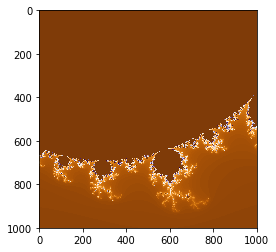

In [32]:
%%time 
result = lattica(1000, 1000, 0.1, 0.5)
plt.imshow(result, cmap ="PuOr")